### Questions/hypothesis to be investigated:

Hypothesis-1) Private schools have higher debts than public schools.

Hypothesis-2) Arts-related majors would have less earnings and Engineering and Technology majors would have more earnings.

### Data Source: 

https://collegescorecard.ed.gov/data/

### Primary observation:

There is a lot of privacy surpressed data, and so it is hard to initially tell if private schools have more debt than public schools, or if art major have less earnings than engineering majors.

### Hypotheses and (in)validtion:

Hypothesis-1) <b>Yes, private schools have higher debts in public schools.</b>

Hypothesis-2) <b>Yes, Art related majors have less earnings than engineering and technology majors.</b>

### Quantitative analysis of hypotheses:

* The total debt mean for private schools is: 1,078,954,103.00 dollars, while The total debt mean for public schools is: 910,999,912.00 dollars. Private schools' overall debt is 8.4% higher than public schools' debt.


* The Engineering/tech majors Earnings Bell Curve shows 68% of <b>Engineering/tech graduates</b> earn yearly between <b>30,000 and 69,000</b> dollars aproximatively. In contrast, the Art majors Earnings Bell Curve shows 68% of <b>art related majors graduates</b> yearly earn between <b>18,000 to 36,000 </b> aproximatively. The <b>maximum earning for engineering/technology</b> majors is <b>153400 dollars</b> yearly, while the <b>maximum earning for art majors is 95700 dollars</b> yearly. We, then, conclude that art related majors have less earnings while Engineering/tech majors have more earnings among the two categories.

Detailed analysis is below

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats


In [2]:
#define dataframe
df= pd.read_csv('https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Field-Data-Elements.csv')

In [3]:
#get general info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216638 entries, 0 to 216637
Data columns (total 18 columns):
UNITID             211020 non-null float64
OPEID6             216638 non-null int64
INSTNM             216638 non-null object
CONTROL            216638 non-null object
MAIN               216638 non-null int64
CIPCODE            216638 non-null int64
CIPDESC            216638 non-null object
CREDLEV            216638 non-null int64
CREDDESC           216638 non-null object
COUNT              216638 non-null object
DEBTMEDIAN         216638 non-null object
DEBTPAYMENT10YR    216638 non-null object
DEBTMEAN           216638 non-null object
TITLEIVCOUNT       216638 non-null object
EARNINGSCOUNT      216638 non-null object
MD_EARN_WNE        216638 non-null object
IPEDSCOUNT1        183767 non-null float64
IPEDSCOUNT2        186139 non-null float64
dtypes: float64(3), int64(4), object(11)
memory usage: 29.8+ MB


In [4]:
#get top 5 rows of df
df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,NaN
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,8.0
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,15,PrivacySuppressed,PrivacySuppressed,61527,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,9.0,10.0


In [5]:
#list the unique values of the type of school
df.CONTROL.unique()

array(['Public', 'Private, nonprofit', 'Private, for-profit', 'Foreign'],
      dtype=object)

In [6]:
#we have a lot of PrivacySupressed data. Deleting rows that contain PrivacySuppressed would result in 
#losing a lot of valuable information that I can use in my second hypotheses. Therefore, I will only 
#remove these values on a separate dataframe.

#dataframe only contains private schools
private= df[df['CONTROL'].str.contains('private', case=False, na=False)]
#reset index
private= private.reset_index(drop=True)
#drop PrivacySuppressed rows
private.drop(private[private['DEBTMEAN'] == 'PrivacySuppressed'].index, inplace=True)
#convert Debt values to integers
private['DEBTMEAN']= private['DEBTMEAN'].astype(int)
#get top 5 rows to make sure changes have been made
private.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100690.0,25034,Amridge University,"Private, nonprofit",1,1907,"Human Development, Family Studies, and Related...",3,Bachelors Degree,10,PrivacySuppressed,PrivacySuppressed,39393,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,18.0
1,100690.0,25034,Amridge University,"Private, nonprofit",1,1907,"Human Development, Family Studies, and Related...",5,Master's Degree,18,PrivacySuppressed,PrivacySuppressed,62523,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,18.0,28.0
5,100690.0,25034,Amridge University,"Private, nonprofit",1,3902,Bible/Biblical Studies.,3,Bachelors Degree,11,PrivacySuppressed,PrivacySuppressed,29572,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,18.0,10.0
11,100690.0,25034,Amridge University,"Private, nonprofit",1,3907,Pastoral Counseling and Specialized Ministries.,5,Master's Degree,13,PrivacySuppressed,PrivacySuppressed,66566,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,14.0,13.0
20,100690.0,25034,Amridge University,"Private, nonprofit",1,5202,"Business Administration, Management and Operat...",5,Master's Degree,13,PrivacySuppressed,PrivacySuppressed,64950,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,10.0,23.0


In [7]:
#dataframe only contains public schools
public= df[df['CONTROL'].str.contains('public', case=False, na=False)]
#reset index
public= public.reset_index(drop=True)
#drop PrivacySuppressed rows
public.drop(public[public['DEBTMEAN'] == 'PrivacySuppressed'].index, inplace=True)
#convert Debt values to integers
public['DEBTMEAN']= public['DEBTMEAN'].astype(int)
#get top 5 rows to make sure changes have been made
public.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,15,PrivacySuppressed,PrivacySuppressed,61527,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,9.0,10.0
10,100654.0,1002,Alabama A & M University,Public,1,305,Forestry.,3,Bachelors Degree,10,PrivacySuppressed,PrivacySuppressed,35598,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,6.0,8.0
12,100654.0,1002,Alabama A & M University,Public,1,403,"City/Urban, Community and Regional Planning.",5,Master's Degree,10,PrivacySuppressed,PrivacySuppressed,68542,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,10.0,7.0
14,100654.0,1002,Alabama A & M University,Public,1,1002,Audiovisual Communications Technologies/Techni...,3,Bachelors Degree,29,31000,322,34379,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,15.0,20.0


In [8]:
#list the unique degrees in our dataframe
private.CREDDESC.unique()

array(['Bachelor\x92s Degree', "Master's Degree", "Associate's Degree",
       'Graduate/Professional Certificate', 'First Professional Degree',
       'Undergraduate Certificate or Diploma', 'Doctoral Degree',
       'Post-baccalaureate Certificate'], dtype=object)

In [9]:
#total debtmean for Private schools
private_debt_sum= private.DEBTMEAN.sum()
assoc_debt_sum1= sum(private['CREDDESC']== "Associate's Degree")
bach_debt_sum1= sum(private['CREDDESC']== 'Bachelor\x92s Degree')
master_debt_sum1= sum(private['CREDDESC']== "Master's Degree")
doc_debt_sum1= sum(private['CREDDESC']== 'Doctoral Degree')
print('The total debt mean for private schools is:', '${:,.2f}'.format(private_debt_sum))

The total debt mean for private schools is: $1,078,954,103.00


In [10]:
#total debtmean for Public schools
public_debt_sum= public.DEBTMEAN.sum()
assoc_debt_sum2= sum(public['CREDDESC']== "Associate's Degree")
bach_debt_sum2= sum(public['CREDDESC']== 'Bachelor\x92s Degree')
master_debt_sum2= sum(public['CREDDESC']== "Master's Degree")
doc_debt_sum2= sum(public['CREDDESC']== 'Doctoral Degree')
print('The total debt mean for public schools is:', '${:,.2f}'.format(public_debt_sum))

The total debt mean for public schools is: $910,999,912.00


##### Observation 1: 

Private schools seem to overall have higher debts than public schools.

In [11]:
#count_1= private['CREDDESC'].count("Associate's Degree")
count_1 = private['CREDDESC'].eq("Associate's Degree").sum()
count_2 = public['CREDDESC'].eq("Associate's Degree").sum()
print('Number of private schools that granted an associate degree is:',count_1, 'while the number of public schools that granted an associate degree is:',count_2)

Number of private schools that granted an associate degree is: 4578 while the number of public schools that granted an associate degree is: 7912


NOTE: 

Because the number of private and public schools that grant each degree can vary in our dataset, we have to normalize our data; this is done in the cell below

In [12]:
#define y axis data initial lists 
public_schools_sums= [assoc_debt_sum2, bach_debt_sum2, master_debt_sum2, doc_debt_sum2]
private_schools_sums= [assoc_debt_sum1, bach_debt_sum1, master_debt_sum1, doc_debt_sum1]

#define y axis data normalized and final lists 
norm_pub = [float(i)/sum(public_schools_sums) for i in public_schools_sums]
norm_priv= [float(i)/sum(private_schools_sums) for i in private_schools_sums]

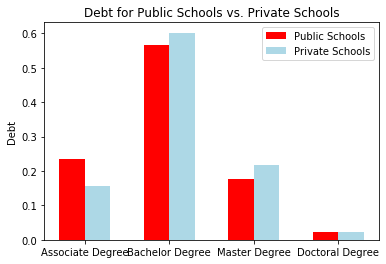

In [13]:
#barplot

labels= ['Associate Degree', 'Bachelor Degree', 'Master Degree', 'Doctoral Degree'] #define labels in a list

x = np.arange(len(labels)) #position of the labels

fig, ax = plt.subplots()

ax.bar(x-0.3/2, norm_pub, width= 0.3, label='Public Schools', color='red')
ax.bar(x+0.3/2, norm_priv, width= 0.3, label='Private Schools', color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Debt')
ax.set_title('Debt for Public Schools vs. Private Schools')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# show the plot
plt.show()

##### Observation 2: 
* Private schools seem to have higher debts than public schools in both the bachelor and master degree.
* Public schools seem to have higher debts than private schools for the associate degrees. 
* Public and private schools have about the same amount of debt during the doctoral degree. 

In [14]:
#get the total debt percentage of public and private schools

private_percent= private_debt_sum/(private_debt_sum+public_debt_sum)
public_percent= public_debt_sum/(private_debt_sum+public_debt_sum)

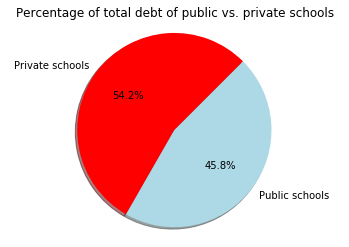

In [15]:
#pie chart
pielabels = 'Private schools', 'Public schools'
sizes = [private_percent, public_percent]
colors = ['red','lightblue']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels= pielabels, colors= colors, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of total debt of public vs. private schools')

plt.show()

##### Observation 3:

Private schools have a higher overall debt than public schools by 8.4%.

TESTING HYPOTHESIS 2

In [16]:
#add a column that categorizes an art vs. an engineering/ technology major

artwords= ['language', 'english', 'literature', 'bible', 'biblical', 'dance' 'history', 'drawing', 'art', 'culinary', 'design', 'video', 'studio', 'theatre', 'drama', 'music']
engtechwords= ['engineering', 'technology', 'technologies', 'computer', 'systems', 'electrical', 'electronics']

df['Major_Category'] = np.where(df['CIPDESC'].str.contains('|'.join(artwords), case=False, na=False), 'Art major',
                               (np.where(df['CIPDESC'].str.contains('|'.join(engtechwords), case=False, na=False), 'engineering/tech major', '')))

In [17]:
#remove Privacy Suppressed rows. This time I removed it from df because this is the last hypothesis I'm testing.
df.drop(df[df['MD_EARN_WNE']== 'PrivacySuppressed'].index, inplace= True)   # this doesn't affect the min and max of the median earnings
#reset index
df.reset_index(drop= True)  
#convert earning median to integer
df['MD_EARN_WNE']= df['MD_EARN_WNE'].astype(int)
#get top 5 rows to make sure changes have been made
df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,Major_Category
15,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelors Degree,25,36250,376,37194,33,33,54300,17.0,16.0,engineering/tech major
24,100654.0,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelors Degree,46,31505,327,33085,32,31,25400,24.0,33.0,
27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelors Degree,22,34809,361,36482,33,31,54500,19.0,11.0,engineering/tech major
28,100654.0,1002,Alabama A & M University,Public,1,1419,Mechanical Engineering.,3,Bachelors Degree,PrivacySuppressed,36928,383,38900,24,24,45800,13.0,17.0,engineering/tech major
37,100654.0,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelors Degree,39,29956,311,30970,30,30,24000,28.0,28.0,Art major


In [18]:
#earnings statistical description of engineering/tech majors  
df['MD_EARN_WNE'][df['Major_Category']== 'engineering/tech major'].describe()

count      5278.000000
mean      49677.169382
std       19620.351570
min        9700.000000
25%       33000.000000
50%       50350.000000
75%       63500.000000
max      153400.000000
Name: MD_EARN_WNE, dtype: float64

In [19]:
#earnings statistical description of art majors  
df['MD_EARN_WNE'][df['Major_Category']== 'Art major'].describe()

count     4400.000000
mean     27243.045455
std       8824.451543
min       7600.000000
25%      21600.000000
50%      25500.000000
75%      30900.000000
max      95700.000000
Name: MD_EARN_WNE, dtype: float64

In [20]:
# define constants for bell curve- Tech majors
tech_mu = 49677.17  #population mean
tech_sigma = 19620.35  #population standard deviation
tech_min = 9700  #population lower bound
tech_max = 153400  #population upper bound

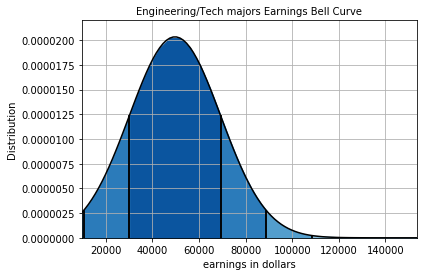

In [21]:
#Bell curve for Engineering/tech majors
tech_x = np.linspace(tech_min, tech_max, 100)

tech_y = scipy.stats.norm.pdf(tech_x,tech_mu,tech_sigma)

plt.plot(tech_x,tech_y, color='black')

# fill area 1

pt1 = tech_mu + tech_sigma
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,tech_mu, tech_sigma)], color='black')

pt2 = tech_mu - tech_sigma
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,tech_mu, tech_sigma)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,tech_mu,tech_sigma)

plt.fill_between(ptx, pty, color='#0b559f', alpha='1.0')

# fill area 2

pt1 = tech_mu + tech_sigma
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,tech_mu, tech_sigma)], color='black')

pt2 = tech_mu + 2.0 * tech_sigma
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,tech_mu, tech_sigma)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,tech_mu,tech_sigma)

plt.fill_between(ptx, pty, color='#2b7bba', alpha='1.0')

# fill area 3

pt1 = tech_mu - tech_sigma
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,tech_mu, tech_sigma)], color='black')

pt2 = tech_mu - 2.0 * tech_sigma
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,tech_mu, tech_sigma)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,tech_mu,tech_sigma)

plt.fill_between(ptx, pty, color='#2b7bba', alpha='1.0')


# fill area 4

pt1 = tech_mu + 2.0 * tech_sigma
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,tech_mu, tech_sigma)], color='black')

pt2 = tech_mu + 3.0 * tech_sigma
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,tech_mu, tech_sigma)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,tech_mu,tech_sigma)

plt.fill_between(ptx, pty, color='#539ecd', alpha='1.0')

# fill area 5

pt1 = tech_mu - 2.0 * tech_sigma
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,tech_mu, tech_sigma)], color='black')

pt2 = tech_mu - 3.0 * tech_sigma
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,tech_mu, tech_sigma)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,tech_mu,tech_sigma)

plt.fill_between(ptx, pty, color='#539ecd', alpha='1.0')

# fill area 6

pt1 = tech_mu + 3.0 * tech_sigma
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,tech_mu, tech_sigma)], color='black')

pt2 = tech_mu + 10.0 *tech_sigma
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,tech_mu, tech_sigma)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,tech_mu,tech_sigma)

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')


# fill area 7

pt1 = tech_mu - 3.0 * tech_sigma
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,tech_mu, tech_sigma)], color='black')

pt2 = tech_mu - 10.0 * tech_sigma
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,tech_mu, tech_sigma)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,tech_mu,tech_sigma)

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')


plt.grid()

plt.xlim(tech_min,tech_max)
plt.ylim(0,0.000022)

plt.title('Engineering/Tech majors Earnings Bell Curve',fontsize=10)

plt.xlabel('earnings in dollars')
plt.ylabel('Distribution')

plt.show()

##### Observation 4: 

* The Engineering/tech majors Earnings Bell Curve shows 68% of Engineering/tech graduates earn yearly between 30,000 and 69,000 dollars aproximatively.


In [22]:
# define constants for bell curve- Art majors
art_mu = 27243.05  #population mean
art_sigma = 8824.45  #population standard deviation
art_min = 7600  #population lower bound
art_max = 95700  #population upper bound

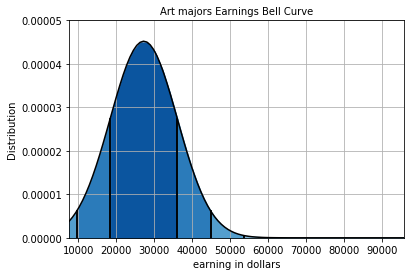

In [23]:
#Bell curve for Art majors
art_x = np.linspace(art_min, art_max, 100)

art_y = scipy.stats.norm.pdf(art_x,art_mu,art_sigma)

plt.plot(art_x,art_y, color='black')

# fill area 1

art_pt1 = art_mu + art_sigma
plt.plot([art_pt1 ,art_pt1 ],[0.0,scipy.stats.norm.pdf(art_pt1 , art_mu, art_sigma)], color='black')

art_pt2 = art_mu-art_sigma
plt.plot([art_pt2 ,art_pt2 ],[0.0,scipy.stats.norm.pdf(art_pt2 ,art_mu, art_sigma)], color='black')

art_ptx = np.linspace(art_pt1, art_pt2, 10)
art_pty = scipy.stats.norm.pdf(art_ptx,art_mu, art_sigma)

plt.fill_between(art_ptx, art_pty, color='#0b559f', alpha='1.0')

# fill area 2

art_pt1 = art_mu + art_sigma
plt.plot([art_pt1 ,art_pt1 ],[0.0,scipy.stats.norm.pdf(art_pt1 ,art_mu, art_sigma)], color='black')

art_pt2 = art_mu + 2.0 * art_sigma
plt.plot([art_pt2 ,art_pt2 ],[0.0,scipy.stats.norm.pdf(art_pt2 ,art_mu, art_sigma)], color='black')

art_ptx = np.linspace(art_pt1, art_pt2, 10)
art_pty = scipy.stats.norm.pdf(art_ptx,art_mu, art_sigma)

plt.fill_between(art_ptx, art_pty, color='#2b7bba', alpha='1.0')

# fill area 3

art_pt1 = art_mu- art_sigma
plt.plot([art_pt1 ,art_pt1 ],[0.0,scipy.stats.norm.pdf(art_pt1 ,art_mu, art_sigma)], color='black')

art_pt2 = art_mu - 2.0 * art_sigma
plt.plot([art_pt2 ,art_pt2 ],[0.0,scipy.stats.norm.pdf(art_pt2 ,art_mu, art_sigma)], color='black')

art_ptx = np.linspace(art_pt1, art_pt2, 10)
art_pty = scipy.stats.norm.pdf(art_ptx,art_mu, art_sigma)

plt.fill_between(art_ptx, art_pty, color='#2b7bba', alpha='1.0')

# fill area 4

art_pt1 = art_mu + 2.0 * art_sigma
plt.plot([art_pt1 ,art_pt1 ],[0.0,scipy.stats.norm.pdf(art_pt1 ,art_mu, art_sigma)], color='black')

art_pt2 = art_mu + 3.0 * art_sigma
plt.plot([art_pt2 ,art_pt2 ],[0.0,scipy.stats.norm.pdf(art_pt2 ,art_mu, art_sigma)], color='black')

art_ptx = np.linspace(art_pt1, art_pt2, 10)
art_pty = scipy.stats.norm.pdf(art_ptx,art_mu, art_sigma)

plt.fill_between(art_ptx, art_pty, color='#539ecd', alpha='1.0')

# fill area 5

art_pt1 = art_mu - 2.0 * art_sigma
plt.plot([art_pt1 ,art_pt1 ],[0.0,scipy.stats.norm.pdf(art_pt1 ,art_mu, art_sigma)], color='black')

art_pt2 = art_mu - 3.0 * art_sigma
plt.plot([art_pt2 ,art_pt2 ],[0.0,scipy.stats.norm.pdf(art_pt2 ,art_mu, art_sigma)], color='black')

art_ptx = np.linspace(art_pt1, art_pt2, 10)
art_pty = scipy.stats.norm.pdf(art_ptx,art_mu, art_sigma)

plt.fill_between(art_ptx, art_pty, color='#539ecd', alpha='1.0')

# fill area 6

art_pt1 = art_mu + 3.0 * art_sigma
plt.plot([art_pt1 ,art_pt1 ],[0.0,scipy.stats.norm.pdf(art_pt1 ,art_mu, art_sigma)], color='black')

art_pt2 = art_mu + 10.0 * art_sigma
plt.plot([art_pt2 ,art_pt2 ],[0.0,scipy.stats.norm.pdf(art_pt2 ,art_mu, art_sigma)], color='black')

art_ptx = np.linspace(art_pt1, art_pt2, 10)
art_pty = scipy.stats.norm.pdf(art_ptx,art_mu, art_sigma)

plt.fill_between(art_ptx, art_pty, color='#89bedc', alpha='1.0')


# fill area 7

art_pt1 = art_mu - 3.0 * art_sigma
plt.plot([art_pt1 ,art_pt1 ],[0.0,scipy.stats.norm.pdf(art_pt1 ,art_mu, art_sigma)], color='black')

art_pt2 = art_mu - 10.0 * art_sigma
plt.plot([art_pt2 ,art_pt2 ],[0.0,scipy.stats.norm.pdf(art_pt2 ,art_mu, art_sigma)], color='black')

art_ptx = np.linspace(art_pt1, art_pt2, 10)
art_pty = scipy.stats.norm.pdf(art_ptx,art_mu, art_sigma)

plt.fill_between(art_ptx, art_pty, color='#89bedc', alpha='1.0')


plt.grid()

plt.xlim(art_min,art_max)
plt.ylim(0,0.00005)

plt.title('Art majors Earnings Bell Curve',fontsize=10)

plt.xlabel('earning in dollars')
plt.ylabel('Distribution')

plt.show()

##### Observation 5:
    
* The Art majors Earnings Bell Curve shows 68% of art related majors graduates yearly earn between 18,000 to 36,000 aproximatively.




### What I learned doing this project: 

I learned that yes, private schools have higher debts than public schools, but it is only by 8.4% which is less than what I initially imagined before doing the project. I also, learned how to do the bell curve; this was the first time I am implementing it through Python.

### Sources:
    
https://www.mymajors.com/college-majors/art/

https://stackoverflow.com/questions/43055050/python-pandas-if-column-string-contains-word-flag
    
https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas

https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions/39109099

https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

https://www.geeksforgeeks.org/python-add-only-numeric-values-present-in-a-list/

https://stackoverflow.com/questions/21208376/converting-float-to-dollars-and-cents

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

https://stackoverflow.com/questions/26785354/normalizing-a-list-of-numbers-in-python

https://pythonforundergradengineers.com/plotting-normal-curve-with-python.html

https://www.science-emergence.com/Articles/How-to-plot-a-normal-distribution-with-matplotlib-in-python-/